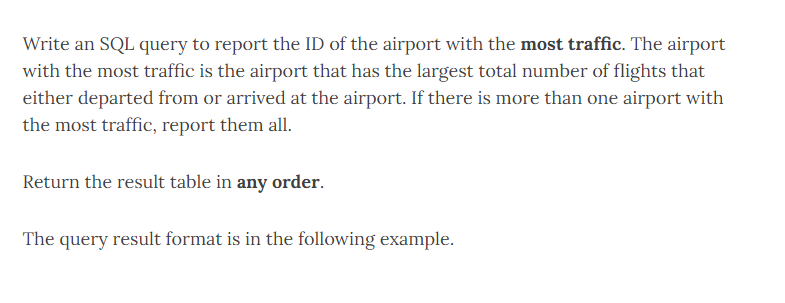

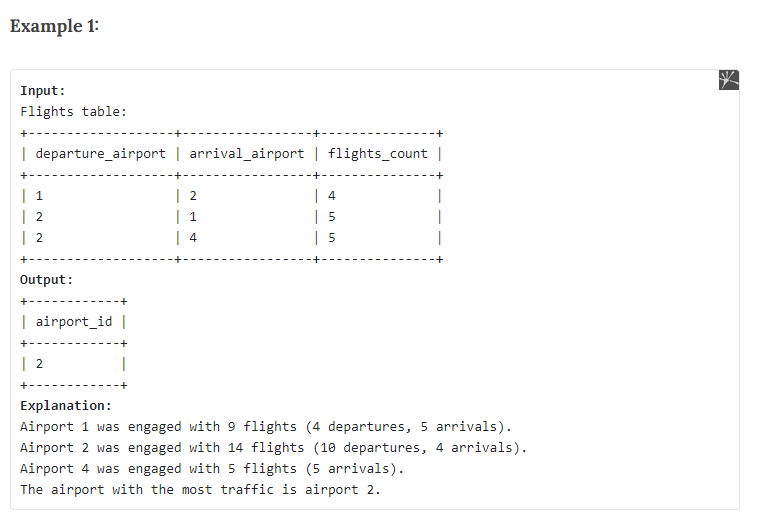

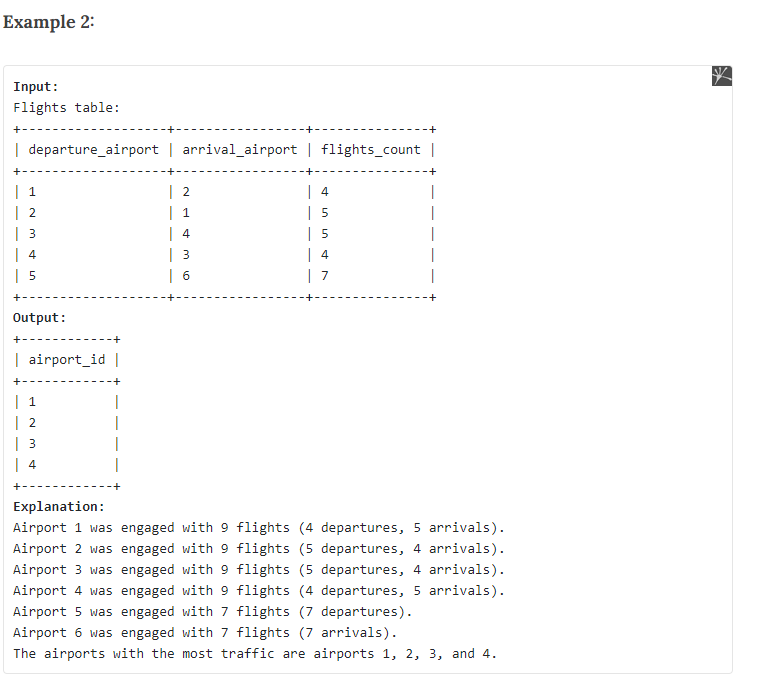

In [ ]:
with cte as
(
    select deperature_airport as airport_id,
    sum(flights_count) as flight_count
    from Flights
    group by deperature_airport
),
cte2 as
(
    select arrival_airport as airport_id,
    sum(flight_count) as flight_count
    from Flights
    group by arrival_airport
),
cte3 as
(
    select airport_id,flight_count from cte
    UNION
    select airport_id,flight_count from cte2
),
cte4 as
(
    select airport_id,sum(flight_count) as total_count
    from cte3 group by airport_id
),

select airport_id from cte4
where total_count = (select max(total_count) from cte4)